# Optimización de funciones escalares diferenciables con `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" width="300px" height="100px" />

> - Mediante optimización se obtienen soluciones elegantes tanto en teoría como en ciertas aplicaciones. 
> - La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
> - Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
> - El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

**Referencia:**
- http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/OpenStreetMap_routing_service.png/300px-OpenStreetMap_routing_service.png" width="300px" height="100px" />

Algunas aplicaciones son:

1. Ingeniería
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
2. Distribución óptima de recursos.
 - Distribución de rutas de vuelo.
 - Encontrar una dieta óptima.
 - Planeación de ruta óptima.
3. Optimización financiera
 - Administración de riesgos.
 - Portafolios de inversión.

En esta clase veremos aspectos básicos de optimización. En específico, veremos cómo obtener máximos y mínimos de una función escalar de una variable (como en cálculo diferencial).

___
## 0. Librerías que usaremos

Como ya dijimos en la primer clase `python` es el lenguaje de programación (el cual es de alto nivel). Sin embargo, `python` solo tiene unos pocos comandos primitivos y para hacer más fácil su uso en nuestras actividades de simulación en ingeniería, otras personas ya han escrito ciertas librerías por nosotros.

### 0.1 `NumPy`

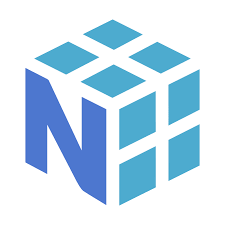

`NumPy` (Numerical Python) es la librería fundamental para computación científica (numérica) con `Python`. Contiene, entre otras cosas:
- un objeto tipo arreglo N-dimensional muy poderoso
- funciones sofisticadas
- funciones de álgebra lineal, transformada de Fourier y números aleatorios.

Por lo anterior, `NumPy` es de amplio uso entre la comunidad científica e ingenieril (por su manejo de cantidades vectoriales). De la misma manera, se usa para guardar datos. Para nuestros propósitos, se puede usar libremente.

**Referencia:**
- http://www.numpy.org/

`NumPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [8]:
# importar la librería numpy
import numpy as np

In [9]:
# Creamos un vector
x = np.array([0, 7, 8.4, -3.5, 2])
x

array([ 0. ,  7. ,  8.4, -3.5,  2. ])

In [10]:
# Función seno sobre los elementos de vector x
np.sin(x)

array([0.        , 0.6569866 , 0.85459891, 0.35078323, 0.90929743])

$$
\int e^x dx = e^x +C
$$

$$
\int_{1}^{2} e^{x^2} dx
$$

### 0.2 `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.sympy.org/static/images/logo.png" width="300px" height="100px" />

`SymPy` (Symbolic Python) es una librería de `Python` para matemáticas simbólicas. Su objetivo es convertirse en un sistema de álgebra computacional con las mejores características, manteniendo el código lo más simple posible para que sea comprensible.

**Referencia:**
- http://www.sympy.org/en/index.html

`SymPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [11]:
# importar la librería sympy
import sympy as sym

In [12]:
# Ayuda en la función init_printing
help(sym.init_printing)

Help on function init_printing in module sympy.interactive.printing:

init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)
    Initializes pretty-printer depending on the environment.
    
    Parameters
    
    pretty_print : boolean, default=True
        If True, use pretty_print to stringify or the provided pretty
        printer; if False, use sstrrepr to stringify or the provided string
        printer.
    order : string or None, default='lex'
        There are a few different settings for this parameter:
        lex (default), which is lexographic order;
        grlex, which is graded lexographic order;
        grevlex, which is reversed graded lexographic order;
        old, which is used for compatibil

In [14]:
# imprimir en formato latex
sym.init_printing(use_latex='mathjax')

La funcionalidad de imprimir en formato LaTex que nos da `SymPy` mediante el proyecto `mathjax` hace de `SymPy` una herramienta muy atractiva...

Notar que en `SymPy` y en `NumPy` existen funciones con el mismo nombre, pero reciben tipos de datos diferentes...

In [16]:
# Definimos la variable simbólica x
sym.var('x')

x

In [17]:
sym.sin(x)

sin(x)

In [18]:
np.sin(x)

TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable sin method

In [19]:
y = np.array([0, 1, 3.14])
np.sin(y)

array([0.        , 0.84147098, 0.00159265])

In [20]:
sym.sin(y)

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'could_extract_minus_sign'

In [24]:
# from sympy import *
# from numpy import *
# Esta práctica no es para nada recomendable.

In [28]:
sin(y)

array([0.        , 0.84147098, 0.00159265])

In [29]:
log(y)

/home/esteban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([     -inf, 0.       , 1.1442228])

Explicar el uso de la sintaxis `from numpy import *` y sus peligros (no recomendable).

### 0.3 `PyPlot` de `matplotlib`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://matplotlib.org/_static/logo2.svg" width="300px" height="100px" />

El módulo `PyPlot` de la librería `matplotlib` contiene funciones que nos permite generar una gran cantidad de gráficas rápidamente. Las funciones de este módulo están escritas con el mismo nombre que las funciones para graficar en `Matlab`.

**Referencia:**
- https://matplotlib.org/api/pyplot_summary.html

In [30]:
# importar matplotlib.pyplot
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
# comando para que las gráficas salgan en la misma ventana
%matplotlib inline

Ya que revisamos todas las librerías que usaremos, empecemos con la clase como tal...

___
Basamos todos los resultados en los siguientes teoremas:

## 1. Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$, y si la derivada $f'(c)$ existe en el punto $c$, entonces $f'(c) = 0$.

### Ejemplo

Sabemos que la función $f(x)=x^2$ tiene un mínimo global en $x=0$, pues

$$f(x)=x^2\geq0,\qquad\text{y}\qquad f(x)=x^2=0 \qquad\text{si y solo si}\qquad x=0.$$

In [57]:
# declarar la variable real x
sym.var('x')

x

In [58]:
# declarar ahora f=x^2 y mostrar
f = x**2  # En python x^2 es otra cosa

Cuidado

In [59]:
4**2

16

In [60]:
4^2 #  4: 1 0 0
    #  2: 0 1 0
    #     1 1 0: 6

6

In [61]:
# derivar f respecto a x y mostrar
df = sym.diff(f, x)  # df / dx
df

2⋅x

In [62]:
# resolver f'(x)=0 y mostrar soluciones
help(sym.solve)

Help on function solve in module sympy.solvers.solvers:

solve(f, *symbols, **flags)
    Algebraically solves equations and systems of equations.
    
    Currently supported are:
        - polynomial,
        - transcendental
        - piecewise combinations of the above
        - systems of linear and polynomial equations
        - systems containing relational expressions.
    
    Input is formed as:
    
    * f
        - a single Expr or Poly that must be zero,
        - an Equality
        - a Relational expression
        - a Boolean
        - iterable of one or more of the above
    
    * symbols (object(s) to solve for) specified as
        - none given (other non-numeric objects will be used)
        - single symbol
        - denested list of symbols
          e.g. solve(f, x, y)
        - ordered iterable of symbols
          e.g. solve(f, [x, y])
    
    * flags
        'dict'=True (default is False)
            return list (perhaps empty) of solution mappings
        's

In [63]:
sol = sym.solve(df, x)
sol

[0]

In [64]:
# Encuentra también soluciones complejas
sym.solve(x**2 + 1, x)

[-ⅈ, ⅈ]

In [65]:
# Puedo resolver ecuaciones que involucren más de una variable
sym.solve(x**2 * y + 3 * y**3 * x + 1, x)

[]

Veamos la gráfica...

In [66]:
# convertir f e una función que se pueda evaluar numéricamente (función lambdify de la librería sympy)
f_num = sym.lambdify(x, f, 'numpy')

In [67]:
help(sym.lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(args, expr, modules=None, printer=None, use_imps=True, dummify=False)
    Translates a SymPy expression into an equivalent numeric function
    
    For example, to convert the SymPy expression ``sin(x) + cos(x)`` to an
    equivalent NumPy function that numerically evaluates it:
    
    >>> from sympy import sin, cos, symbols, lambdify
    >>> import numpy as np
    >>> x = symbols('x')
    >>> expr = sin(x) + cos(x)
    >>> expr
    sin(x) + cos(x)
    >>> f = lambdify(x, expr, 'numpy')
    >>> a = np.array([1, 2])
    >>> f(a)
    [1.38177329 0.49315059]
    
    The primary purpose of this function is to provide a bridge from SymPy
    expressions to numerical libraries such as NumPy, SciPy, NumExpr, mpmath,
    and tensorflow. In general, SymPy functions do not work with objects from
    other libraries, such as NumPy arrays, and functions from numeric
    libraries like NumPy or mpmath do not work on SymPy e

In [68]:
f

 2
x 

In [69]:
# f es una expresión simbólica y no se puede evaluar
f(10)

TypeError: 'Pow' object is not callable

In [72]:
# f_num sí se puede evaluar
f_num(10)

100

In [73]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [74]:
# Coordenadas x (abscisas)
x_num = np.linspace(-10, 10, 100)
x_num

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [75]:
y_num = f_num(x_num)
y_num

array([1.00000000e+02, 9.60004081e+01, 9.20824406e+01, 8.82460973e+01,
       8.44913784e+01, 8.08182838e+01, 7.72268136e+01, 7.37169677e+01,
       7.02887460e+01, 6.69421488e+01, 6.36771758e+01, 6.04938272e+01,
       5.73921028e+01, 5.43720029e+01, 5.14335272e+01, 4.85766758e+01,
       4.58014488e+01, 4.31078461e+01, 4.04958678e+01, 3.79655137e+01,
       3.55167840e+01, 3.31496786e+01, 3.08641975e+01, 2.86603408e+01,
       2.65381084e+01, 2.44975003e+01, 2.25385165e+01, 2.06611570e+01,
       1.88654219e+01, 1.71513111e+01, 1.55188246e+01, 1.39679625e+01,
       1.24987246e+01, 1.11111111e+01, 9.80512193e+00, 8.58075707e+00,
       7.43801653e+00, 6.37690032e+00, 5.39740843e+00, 4.49954086e+00,
       3.68329762e+00, 2.94867871e+00, 2.29568411e+00, 1.72431385e+00,
       1.23456790e+00, 8.26446281e-01, 4.99948985e-01, 2.55076013e-01,
       9.18273646e-02, 1.02030405e-02, 1.02030405e-02, 9.18273646e-02,
       2.55076013e-01, 4.99948985e-01, 8.26446281e-01, 1.23456790e+00,
      

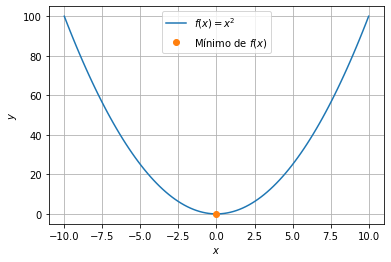

In [81]:
# graficar
# Crear ventana de graficos y damos medidas de la ventana
plt.figure(figsize=(6, 4))
# Sirve para hacer el grafico y determinar sus caracteristicas
plt.plot(x_num, y_num, label='$f(x)=x^2$')
# Punto de mínimo
plt.plot(0, f_num(0), 'o', label='Mínimo de $f(x)$')
# Los signos de $ son para escribir expresiones matemáticas
# Nombre del eje x de la grafica
plt.xlabel('$x$')
# Nombre del eje y
plt.ylabel('$y$')
# Sirve para poner las etiquetas de las graficas
plt.legend()
# Sirve para poner la cuadricula
plt.grid()

**Otra manera de hacer lo anterior**

Concepto de función...

In [82]:
# Concepto de función
# def nombre_de_la_funcion(argumento[s]):
#     --> Operación 1
#     --> Operación 2
#     --> ...
#     --> Operación N
#     return [lo que vaya a devolver]
def cuadrado(x):
    return x**2

In [83]:
cuadrado(x)

 2
x 

In [84]:
cuadrado(x_num)

array([1.00000000e+02, 9.60004081e+01, 9.20824406e+01, 8.82460973e+01,
       8.44913784e+01, 8.08182838e+01, 7.72268136e+01, 7.37169677e+01,
       7.02887460e+01, 6.69421488e+01, 6.36771758e+01, 6.04938272e+01,
       5.73921028e+01, 5.43720029e+01, 5.14335272e+01, 4.85766758e+01,
       4.58014488e+01, 4.31078461e+01, 4.04958678e+01, 3.79655137e+01,
       3.55167840e+01, 3.31496786e+01, 3.08641975e+01, 2.86603408e+01,
       2.65381084e+01, 2.44975003e+01, 2.25385165e+01, 2.06611570e+01,
       1.88654219e+01, 1.71513111e+01, 1.55188246e+01, 1.39679625e+01,
       1.24987246e+01, 1.11111111e+01, 9.80512193e+00, 8.58075707e+00,
       7.43801653e+00, 6.37690032e+00, 5.39740843e+00, 4.49954086e+00,
       3.68329762e+00, 2.94867871e+00, 2.29568411e+00, 1.72431385e+00,
       1.23456790e+00, 8.26446281e-01, 4.99948985e-01, 2.55076013e-01,
       9.18273646e-02, 1.02030405e-02, 1.02030405e-02, 9.18273646e-02,
       2.55076013e-01, 4.99948985e-01, 8.26446281e-01, 1.23456790e+00,
      

In [85]:
dcuadrado = sym.diff(cuadrado(x), x)
dcuadrado

2⋅x

In [86]:
sol = sym.solve(dcuadrado, x)
sol

[0]

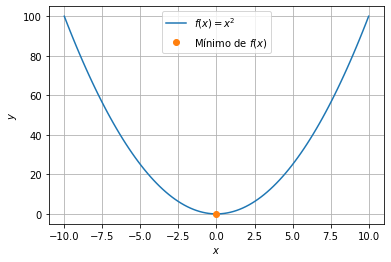

In [88]:
# graficar
# Crear ventana de graficos y damos medidas de la ventana
plt.figure(figsize=(6, 4))
# Sirve para hacer el grafico y determinar sus caracteristicas
plt.plot(x_num, cuadrado(x_num), label='$f(x)=x^2$')
# Punto de mínimo
plt.plot(0, cuadrado(0), 'o', label='Mínimo de $f(x)$')
# Los signos de $ son para escribir expresiones matemáticas
# Nombre del eje x de la grafica
plt.xlabel('$x$')
# Nombre del eje y
plt.ylabel('$y$')
# Sirve para poner las etiquetas de las graficas
plt.legend()
# Sirve para poner la cuadricula
plt.grid()

El converso del teorema anterior no es cierto.

### Actividad
Considere $g(x)=x^3$. 
- Usando `sympy`, muestre que $g'(0)=0$.
- Sin embargo, descartar que $x=0$ es un extremo de $g(x)$ viendo su **gráfica**.

In [89]:
# Declarar la variable simbolica x
sym.var('x')

x

In [90]:
# Definimos funcion g(x)
def g(x):
    return x**3

In [91]:
# Derivamos g(x)
dg = sym.diff(g(x), x)
dg

   2
3⋅x 

In [97]:
# Puntos criticos
sol = sym.solve(dg, x)
sol

[0]

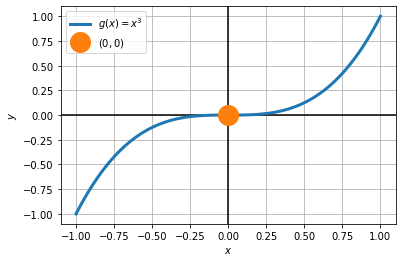

In [105]:
# graficar
x_num = np.linspace(-1, 1, 100)
y_num = g(x_num)
# Crear ventana de graficos y damos medidas de la ventana
plt.figure(figsize=(6, 4))
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
# Sirve para hacer el grafico y determinar sus caracteristicas
plt.plot(x_num, y_num, linewidth=3, label='$g(x)=x^3$')
plt.plot(0, 0, 'o', markersize=20, label='$(0, 0)$')
# Nombre del eje x de la grafica
plt.xlabel('$x$')
# Nombre del eje y
plt.ylabel('$y$')
# Sirve para poner las etiquetas de las graficas
plt.legend()
# Sirve para poner la cuadricula
plt.grid()

## 2. Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f’(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f’’(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f’’(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f’’(c)=0$, entonces el criterio no decide. 

### Ejemplo

Mostrar, usando `sympy`, que la función $f(x)=x^2$ tiene un mínimo relativo en $x=0$.

Ya vimos que $f'(0)=0$. Notemos que:

In [ ]:
# Método subs


In [ ]:
# Sacamos la segunda derivada


Por tanto, por el criterio de la segunda derivada, $f(0)=0$ es un mínimo relativo (en efecto, el mínimo global).

### Ejemplo
¿Qué pasa con $g(x)=x^3$ al intentar utilizar el criterio de la segunda derivada? (usar `sympy`).

In [ ]:
# Definimos la función g(x)=x^3


In [ ]:
# Sacamos la derivada de la función g respecto a x g'(x)=3x^2


In [ ]:
# Observamos que g'(0)=0 (es un punto crítico)


In [ ]:
# Obtenemos la segunda derivada de la función g respecto a x g''(x)=6x


In [ ]:
# Evaluamos g''(0)


Como $g''(0)=0$ entonces el criterio de la segunda derivada no concluye.

### Actividad

¿Qué pasa con $h(x)=x^4$ al intentar utilizar el criterio de la segunda derivada?.

## 3. Método para determinar extremos absolutos de una función continua y=f(x) en [a,b] 

- Determinar todos los valores críticos $c_1, c_2, c_3, \dots, c_n$ en $(a,b)$.
- Evaluar $f$ en todos los valores críticos y en los extremos $x=a$ y $x=b$.
- El más grande y el más pequeño de los valores de la lista $f(a), f(b), f(c_1), f(c_2), \dots, f(c_n)$ son el máximo absoluto y el mínimo absoluto, respectivamente, de f en el intervalo [a,b].

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-6x$ en $\left[0,5\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,5\right]$:

In [ ]:
# Definimos f


In [ ]:
# Derivamos f


In [ ]:
# Resolver la ecuación f'(x)=0 para encontrar puntos críticos


Evaluamos $f$ en los extremos y en los puntos críticos:

Concluimos que el máximo absoluto de $f$ en $\left[0,5\right]$ es $0$ y se alcanza en $x=0$, y que el mínimo absoluto es $-9$ y se alcanza en $x=3$.

In [ ]:
# graficar
# Crear ventana de graficos y damos medidas de la ventana

# Sirve para hacer el grafico y determinar sus caracteristicas

# Nombre del eje x de la grafica

# Nombre del eje y

# Sirve para poner las etiquetas de las graficas

# Sirve para poner la cuadricula


### Actividad
Determinar los valores extremos absolutos de $h(x)=x^3-3x$ en $\left[-2.2,1.8\right]$, usando `sympy`. Mostrar en una gráfica.

### En varias variables...

El procedimiento es análogo. 

Si una función $f:\mathbb{R}^n\to\mathbb{R}$ alcanza un máximo o mínimo local en $\boldsymbol{x}=\boldsymbol{c}\in\mathbb{R}^n$, y $f$ es diferenciable en el punto $\boldsymbol{x}=\boldsymbol{c}$, entonces $\left.\frac{\partial f}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{c}}=\boldsymbol{0}$ (todas las derivadas parciales en el punto $\boldsymbol{x}=\boldsymbol{c}$ son cero).

**Criterio de la segunda derivada:** para ver si es máximo o mínimo, se toma la segunda derivada (matriz jacobiana) y se verifica definición negativa o positiva, respectivamente.

Si se restringe a cierta región, hay ciertas técnicas. La más general, pero también la más compleja es la de **multiplicadores de Lagrange**.

**Ejemplo:** hacer a mano a la vez para corroborar...

In [ ]:
sym.var('x y')
x, y

In [ ]:
def f(x, y):
    return x**2 + y**2

In [ ]:
dfx = sym.diff(f(x,y), x)
dfy = sym.diff(f(x,y), y)
dfx, dfy

In [ ]:
xy_c = sym.solve([dfx, dfy], [x, y])
xy_c

In [ ]:
x_c, y_c = xy_c[x], xy_c[y]
x_c, y_c

In [ ]:
d2fx = sym.diff(f(x,y), x, 2)
d2fy = sym.diff(f(x,y), y, 2)
dfxy = sym.diff(f(x,y), x, y)

Jf = sym.Matrix([[d2fx, dfxy], [dfxy, d2fy]])
Jf.eigenvals()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 100)
y = x
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, f(X, Y))
ax.plot([x_c], [y_c], [f(x_c,y_c)], '*r')

# Anuncios parroquiales

## 1. [Curso gratis sugerido](https://www.kaggle.com/learn/python)

## 2. La próxima clase hay quiz (clases 1 y 2 - lo que hemos visto).

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>